In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy
import math

In [2]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df.shape

(1460, 81)

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Replacing qualitative property slope data with numerical data for easy graphing
df['LandSlope'] = df['LandSlope'].replace(['Gtl'], 1)
df['LandSlope'] = df['LandSlope'].replace(['Mod'], 2)
df['LandSlope'] = df['LandSlope'].replace(['Sev'], 3)
landslope = df[['LandSlope']]
landslope.describe() #Output shows that almost all the slopes are gentle, price is independent of land slope data

,LandSlope
count,1460.000000
mean,1.062329
std,0.276232
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


In [7]:
#Doing the same for other columns that can be quantified on a scale from bad to good (for easy graphing)
    ## Street, Alley, Utilities, LotShape, CentralAir, PoolQC, LandContour, ExterCond, Fireplace Quality
df['Street'] = df['Street'].replace(['Grvl'], 1)
df['Street'] = df['Street'].replace(['Pave'], 2)
df['Utilities'] = df['Utilities'].replace(['ELO'], 1)
df['Utilities'] = df['Utilities'].replace(['NoSeWa'], 2)
df['Utilities'] = df['Utilities'].replace(['NoSewr'], 3)
df['Utilities'] = df['Utilities'].replace(['AllPub'], 4)
df['LotShape'] = df['LotShape'].replace(['IR3'], 1)
df['LotShape'] = df['LotShape'].replace(['IR2'], 2)
df['LotShape'] = df['LotShape'].replace(['IR1'], 3)
df['LotShape'] = df['LotShape'].replace(['Reg'], 4)
df['CentralAir'] = df['CentralAir'].replace(['N'], 0)
df['CentralAir'] = df['CentralAir'].replace(['Y'], 1)

#df['Alley'] = df['Alley'].replace(['NA'], 0)
#df['Alley'] = df['Alley'].replace(['Grvl'], 1)
#df['Alley'] = df['Alley'].replace(['Pave'], 2)
# Wasn't recognizing null values and replacing them; had to use key-value map instead of simple 'replace()'
a = {'Grvl': 1, 'Pave': 2}
df['Alley'] = np.where(df.Alley.isin(a.keys()), df.Alley.replace(a), 0)
d = {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
df['PoolQC'] = np.where(df.PoolQC.isin(d.keys()), df.PoolQC.replace(d), 0)
fq = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df['FireplaceQu'] = np.where(df.FireplaceQu.isin(fq.keys()), df.FireplaceQu.replace(fq), 0)

#Convenient syntax, so I used it for non-null columns too: LandContour and Exterior Condition
lc = {'Low': 1, 'HLS': 2, 'Bnk': 3, 'Lvl': 4}
df['LandContour'] = np.where(df.LandContour.isin(lc.keys()), df.LandContour.replace(lc), 0)
ec = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df['ExterCond'] = np.where(df.ExterCond.isin(ec.keys()), df.ExterCond.replace(ec), 0)

#Can't have sliding scale for Heating, Electrical, Functional, Condition2 and RoofMatl values; dealt with later

quantified_df = df[['Street', 'Alley', 'Utilities', 'LotShape', 'CentralAir',
                    'PoolQC', 'LandContour', 'ExterCond', 'FireplaceQu']]
quantified_df.describe()
#With the exception of Fireplace Quality, they all appear to have near-constant values

,Street,Alley,Utilities,LotShape,CentralAir,PoolQC,LandContour,ExterCond,FireplaceQu
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.995890,0.090411,3.998630,3.591781,0.934932,0.013014,3.814384,3.083562,1.825342
std,0.063996,0.372151,0.052342,0.582296,0.246731,0.204059,0.606509,0.351054,1.810877
min,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,4.000000,3.000000,1.000000,0.000000,4.000000,3.000000,0.000000
50%,2.000000,0.000000,4.000000,4.000000,1.000000,0.000000,4.000000,3.000000,2.000000
75%,2.000000,0.000000,4.000000,4.000000,1.000000,0.000000,4.000000,3.000000,4.000000
max,2.000000,2.000000,4.000000,4.000000,1.000000,4.000000,4.000000,5.000000,5.000000


In [8]:
#Choosing other numerical values to check for constant or near-constant values
quantified_df = df[['LandSlope', 'LowQualFinSF', '3SsnPorch', 'ScreenPorch',
              'PoolArea', 'BsmtHalfBath', 'OverallCond', 'OverallQual', 'KitchenAbvGr']]
quantified_df.describe()

#7 of the 9 values are comprised of more than 50% constant values (exceptions are Overall Quality and Overall Condition)

,LandSlope,LowQualFinSF,3SsnPorch,ScreenPorch,PoolArea,BsmtHalfBath,OverallCond,OverallQual,KitchenAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1.062329,5.844521,3.409589,15.060959,2.758904,0.057534,5.575342,6.099315,1.046575
std,0.276232,48.623081,29.317331,55.757415,40.177307,0.238753,1.112799,1.382997,0.220338
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,6.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,7.000000,1.000000
max,3.000000,572.000000,508.000000,480.000000,738.000000,2.000000,9.000000,10.000000,3.000000


In [9]:
#Removing columns that can be held as constant variables, from all of the above analysis
df = df.drop(['Alley', 'Street', 'Utilities', 'LotShape', 'LandSlope', 'RoofMatl',
             'Heating', 'Electrical', 'Functional', 'LowQualFinSF', '3SsnPorch', 'ScreenPorch',
              'PoolArea', 'PoolQC', 'Condition2', 'LandContour', 'BsmtHalfBath',
              'KitchenAbvGr', 'Fence', 'ExterCond', 'CentralAir'], axis=1)
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Inside,CollgCr,Norm,1Fam,2Story,...,0,61,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,FR2,Veenker,Feedr,1Fam,1Story,...,298,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Inside,CollgCr,Norm,1Fam,2Story,...,0,42,0,NaN,0,9,2008,WD,Normal,223500


In [10]:
#Now, removing columns that are duplicates/very close to duplicates or clearly redundant in value/meaning
df = df.drop(['MiscFeature', 'MiscVal', 'MasVnrType', 'GarageArea'], axis=1)
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Inside,CollgCr,Norm,1Fam,2Story,...,TA,Y,0,61,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,FR2,Veenker,Feedr,1Fam,1Story,...,TA,Y,298,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Inside,CollgCr,Norm,1Fam,2Story,...,TA,Y,0,42,0,9,2008,WD,Normal,223500


<Axes: title={'center': 'Overall House Quality vs Condition'}, xlabel='OverallCond', ylabel='OverallQual'>

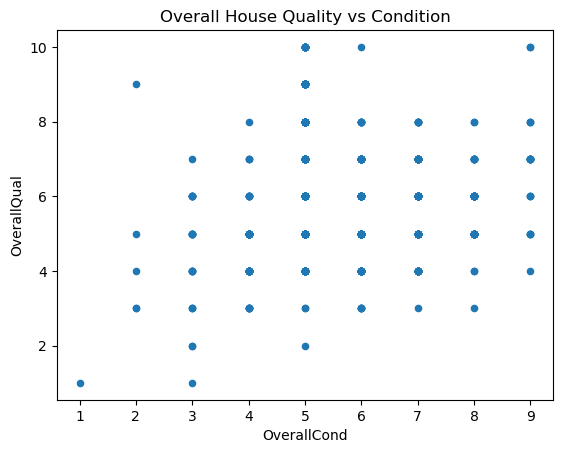

In [11]:
#Condition vs Quality comparison, to search for columns with essentially the same meaning
df.plot(kind='scatter', x='OverallCond', y='OverallQual', title='Overall House Quality vs Condition')


In [12]:
df.shape

(1460, 56)

In [13]:
#Finding incomplete data in each column
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
LotConfig          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
Exterior1st        0
Exterior2nd        0
MasVnrArea         8
ExterQual          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
HeatingQC          0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
BsmtFullBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Fireplaces         0
FireplaceQu        0
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageCars         0
GarageQual        81
GarageCond        81
PavedDrive   

In [14]:
#Dealing with incomplete data - Lot Frontage
df['LotFrontage'] = df['LotFrontage'].fillna(0)

#Dealing with NULL values in the garage and basement data
df['GarageType'] = df['GarageType'].fillna('NG')
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0000)
df['GarageFinish'] = df['GarageFinish'].fillna('NG')
df['GarageQual'] = df['GarageQual'].fillna('NG')
df['GarageCond'] = df['GarageCond'].fillna('NG')

df['BsmtQual'] = df['BsmtQual'].fillna('NB')
df['BsmtCond'] = df['BsmtCond'].fillna('NB')
df['BsmtExposure'] = df['BsmtExposure'].fillna('NB')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NB')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NB')

df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotConfig        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrArea       8
ExterQual        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
MoSold           0
YrSold      

In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [16]:
#Searching for number of duplicates
df.loc[df.duplicated()]

#None in this dataset! '0 rows x 57 columns'

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [17]:
# Creating a sub-dataframe to look at neighborhood and zoning data
n_z = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 
          'LotConfig', 'Neighborhood', 'Condition1']]
n_z.dtypes

MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
LotConfig        object
Neighborhood     object
Condition1       object
dtype: object

In [18]:
n_z.describe()

,MSSubClass,LotFrontage,LotArea
count,1460.000000,1460.000000,1460.000000
mean,56.897260,57.623288,10516.828082
std,42.300571,34.664304,9981.264932
min,20.000000,0.000000,1300.000000
25%,20.000000,42.000000,7553.500000
50%,50.000000,63.000000,9478.500000
75%,70.000000,79.000000,11601.500000
max,190.000000,313.000000,215245.000000


<Axes: title={'center': 'Most Common Neighborhoods'}>

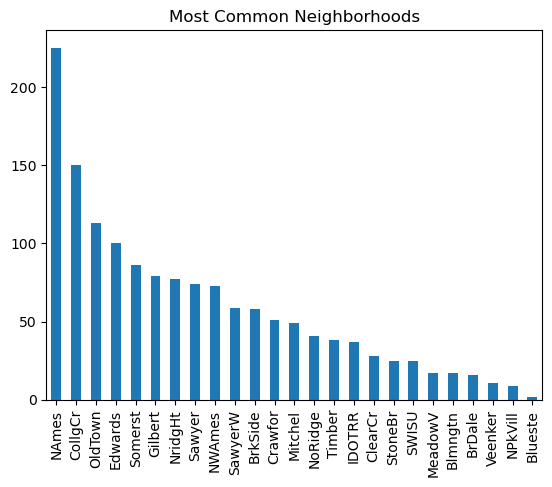

In [19]:
n_z['Neighborhood'].value_counts().plot(kind='bar', title='Most Common Neighborhoods')
#n_z['Neighborhood'].value_counts().head(10).plot(kind='bar', title='Most Common Neighborhoods')

<Axes: title={'center': 'Most Common Housing Zones'}>

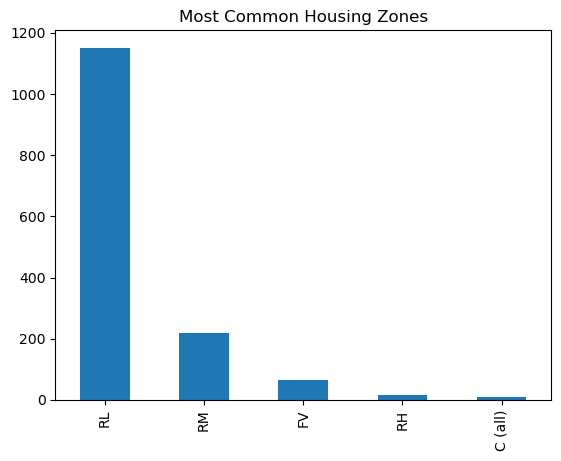

In [20]:
n_z['MSZoning'].value_counts().plot(kind='bar', title='Most Common Housing Zones')

<Axes: title={'center': 'Most Common Types of Dwellings'}>

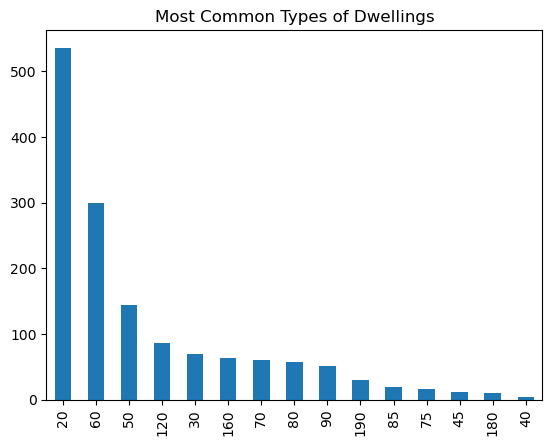

In [21]:
n_z['MSSubClass'].value_counts().plot(kind='bar', title='Most Common Types of Dwellings')

<Axes: title={'center': 'Sale Price Distribution'}, ylabel='Frequency'>

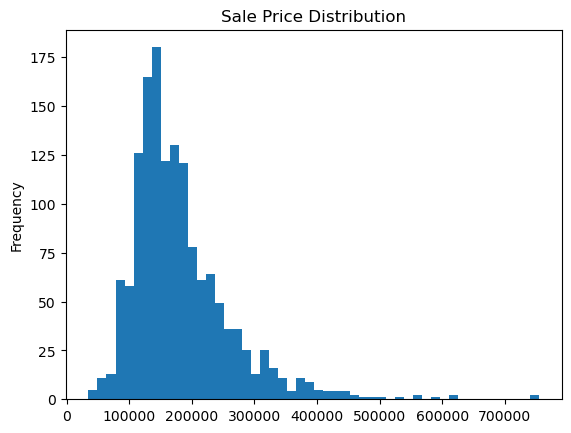

In [22]:
#Finding the skew of prices
df['SalePrice'].plot(kind='hist', bins=50, title='Sale Price Distribution')

<Axes: >

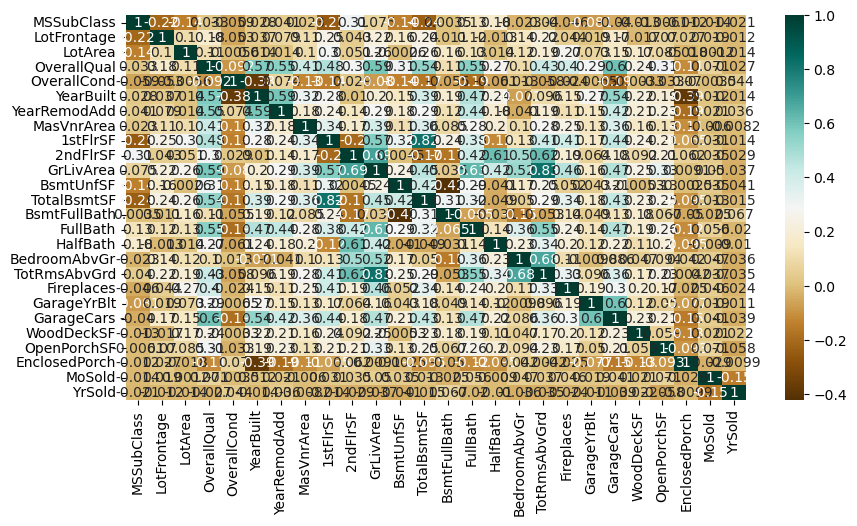

In [23]:
#Heatmap to find dependent variables
num_df = df[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
            '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtUnfSF', 'TotalBsmtSF',
           'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold']]
plt.figure(figsize=(10,5))
c= num_df.corr()
sb.heatmap(c,cmap="BrBG",annot=True)

<Axes: >

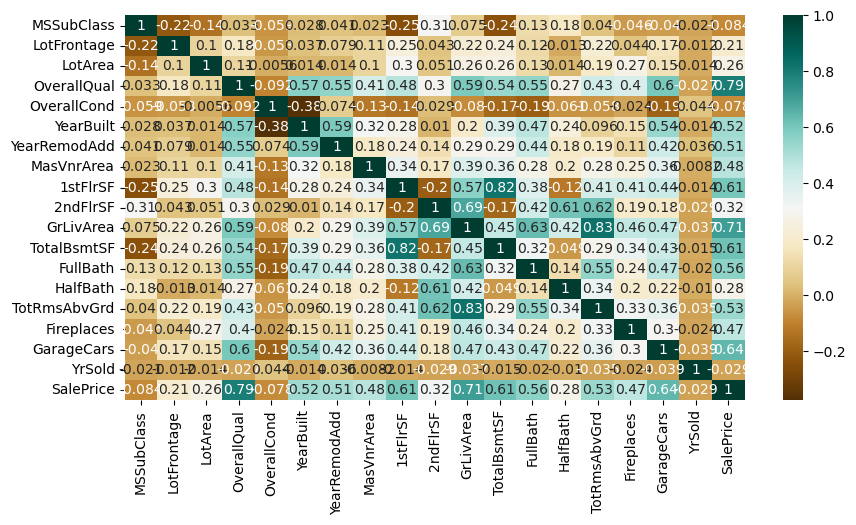

In [24]:
#Heatmap to find dependent variables
num_df = df[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
           'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
            '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'HalfBath',
           'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'YrSold', 'SalePrice']]
plt.figure(figsize=(10,5))
c= num_df.corr()
sb.heatmap(c,cmap="BrBG",annot=True)

Text(5, 30, 'correlation coefficient = 0.2638')

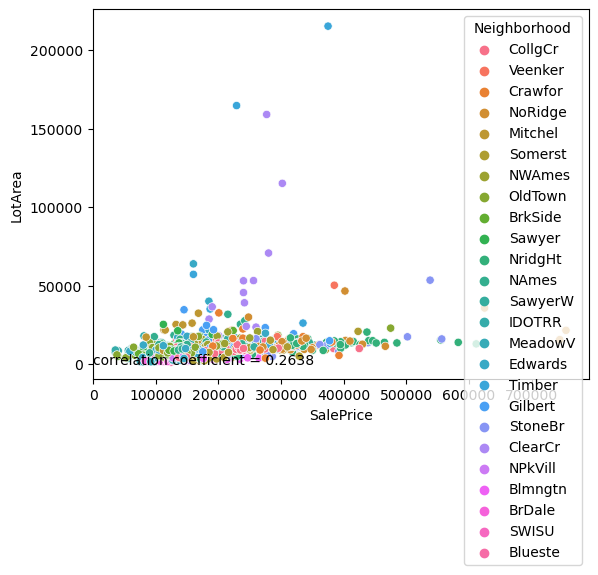

In [25]:
sb.scatterplot(y='LotArea',
              x='SalePrice',
              hue='Neighborhood',
              data=df)
coeff = scipy.stats.pearsonr(x=df['LotArea'], y=df['SalePrice'])[0]
plt.text(5, 30, 'correlation coefficient = ' + str(round(coeff, 4)))

<Axes: >

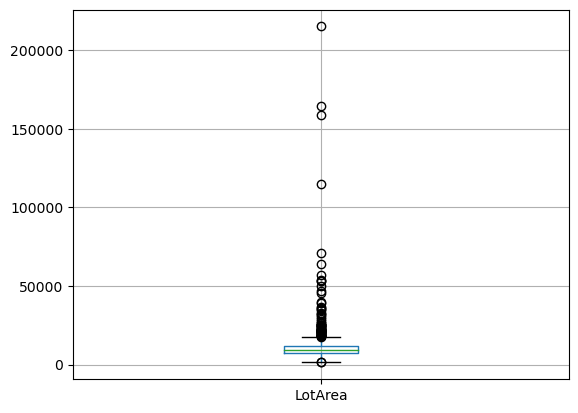

In [26]:
df.boxplot(column=['LotArea'])

Text(5, 30, 'correlation coefficient = 0.3719')

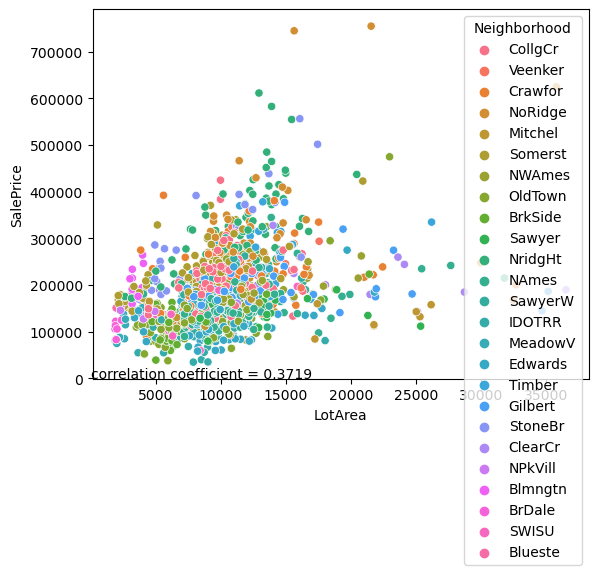

In [27]:
q_low = df["LotArea"].quantile(0.01)
q_hi  = df["LotArea"].quantile(0.99)

#Assigning filtered dataframe to old dataframe
df = df[(df["LotArea"] < q_hi) & (df["LotArea"] > q_low)]

sp = sb.scatterplot(x='LotArea',
              y='SalePrice',
              hue='Neighborhood',
              data=df)
coeff = scipy.stats.pearsonr(x=df['LotArea'], y=df['SalePrice'])[0]
plt.text(5, 30, 'correlation coefficient = ' + str(round(coeff, 4)))

Text(5, 30, 'correlation coefficient = 0.7089')

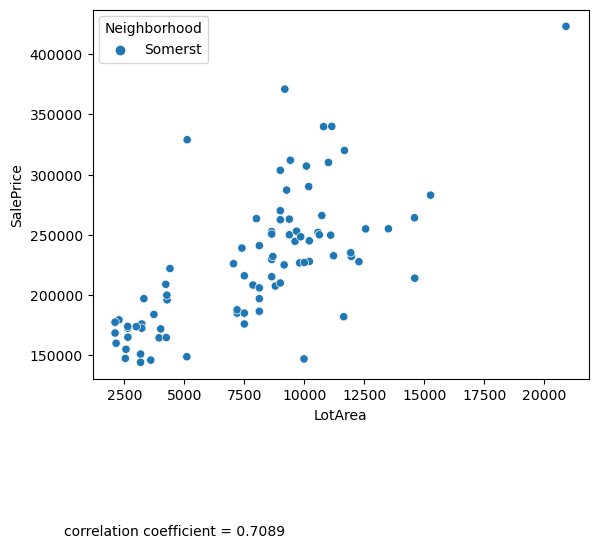

In [28]:
#Lot area holding neighborhood constant
fdf = df.query('Neighborhood == "Somerst"')
sp = sb.scatterplot(x='LotArea',
              y='SalePrice',
              hue='Neighborhood',
              data=fdf)
coeff = scipy.stats.pearsonr(x=fdf['LotArea'], y=fdf['SalePrice'])[0]
plt.text(5, 30, 'correlation coefficient = ' + str(round(coeff, 4)))

Text(5, 30, 'correlation coefficient = 0.8018')

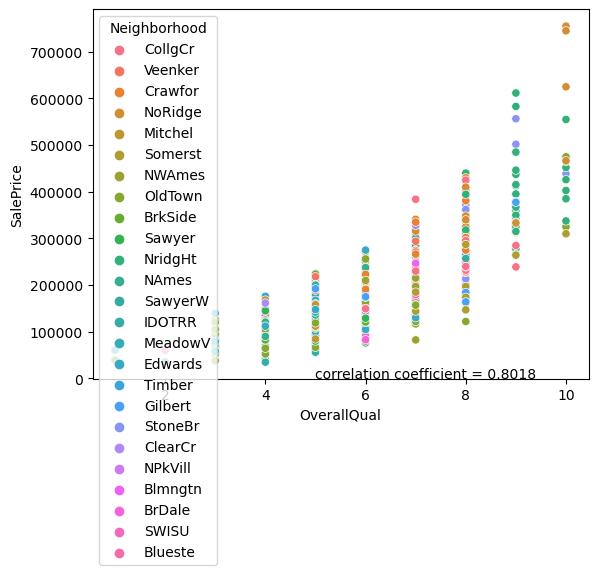

In [29]:
#Price against overall quality and condition columns
sp = sb.scatterplot(x='OverallQual',
              y='SalePrice',
              hue='Neighborhood',
              data=df)
coeff = scipy.stats.pearsonr(x=df['OverallQual'], y=df['SalePrice'])[0]
plt.text(5, 30, 'correlation coefficient = ' + str(round(coeff, 4)))

Text(5, 30, 'correlation coefficient = -0.0817')

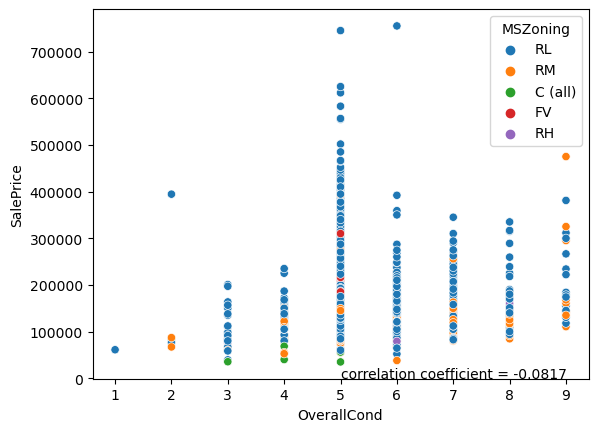

In [30]:
sp = sb.scatterplot(x='OverallCond',
              y='SalePrice',
              hue='MSZoning',
              data=df)
coeff = scipy.stats.pearsonr(x=df['OverallCond'], y=df['SalePrice'])[0]
plt.text(5, 30, 'correlation coefficient = ' + str(round(coeff, 4)))